<a href="https://colab.research.google.com/github/mainarel/-Numerical_methods/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

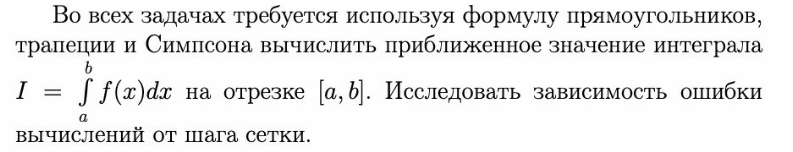

In [39]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad


def rectangular_method(a ,b ,f):
    return f(a)*(b - a)

def trapezoid_method(a, b, f):
  return (b - a) * (f(a) + f(b)) / 2

def simpson_method (a,b,f):
  return(b-a)/6*(f(a)+4*f((a+b)/2)+f(b))

def func(x):
  return (math.log(x))*x

def integ_real(a, b, f):
  res, err = quad(f, a, b)
  return res

def three_eights(a, b, f):
    return (b - a) * (f(a) + 3 * f((2 * a + b) / 3) + 3 * f((a + 2 * b) / 3) + f(b)) / 8


k = 2.0050596885674663 for rectangular_method
k = 2.981171718606839 for trapezoid_method
k = 4.943484935721404 for simpson_method
k = 4.943638057594617 for three_eights


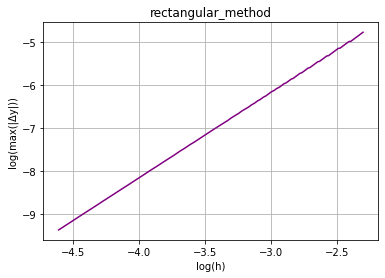

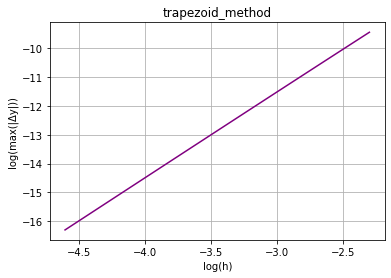

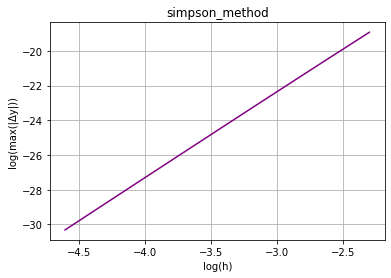

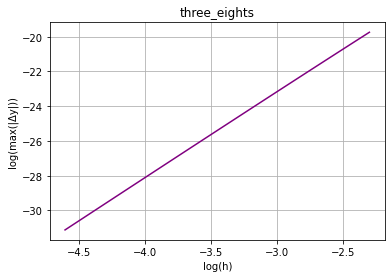

In [40]:
a = 1
b = 2
h_array = np.arange(0.01, 0.1, 0.001) # min, max, step

def difference(true, result):
    dfr = [abs(true[i] - result[i]) for i in range(len(true))]
    return max(dfr)

def logarithm():
    dfr1_array = []
    dfr2_array = []
    dfr3_array = []
    dfr4_array = []

    hlog_array = []
    y_array = []
  
    for h in h_array:
        hlog_array.append(math.log(h))
        x_array = np.arange(a,b+h, h)

        error1 = 0
        error2 = 0
        error3 = 0
        error4 = 0

        for j in range(len(x_array)-1):
          
          t1 = (integ_real(x_array[j], x_array[j+1], func))

          t2 = (rectangular_method(x_array[j], x_array[j+1], func)) 
          error1 = max(error1, abs(t1 - t2))

          t3 = (trapezoid_method(x_array[j], x_array[j+1], func))
          error2 = max(error2, abs(t1 - t3))
          
          t4 = (simpson_method(x_array[j], x_array[j+1], func))
          error3 = max(error3, abs(t1 - t4))
          
          t5 = (three_eights(x_array[j], x_array[j+1], func))
          error4 = max(error4, abs(t1 - t5))

        dfr1_array.append(math.log(error1))
        dfr2_array.append(math.log(error2))
        dfr3_array.append(math.log(error3))
        dfr4_array.append(math.log(error4))

    dfr_array = [dfr1_array, dfr2_array, dfr3_array, dfr4_array ]
    method = ['rectangular_method', 'trapezoid_method','simpson_method', 'three_eights']
    for i in range (4):
     dd = plt.figure(i)
     ax = dd.add_subplot(111)
     ax.set_xlabel('log(h)')
     ax.set_ylabel("log(max(|Δy|))")
     plt.title(method[i])
     plt.grid()
     gradient = (dfr_array[i][-1] - dfr_array[i][0]) / (hlog_array[-1] - hlog_array[0])
     print ('k =', gradient, 'for', method[i])

     plt.plot (hlog_array,dfr_array[i], label = "Абсолютная погрешность", color = 'purple')
    plt.show()  

   

logarithm()

